In [1]:
library(outbreaks)
data(influenza_england_1978_school)
Ndata <- 763
sol <- influenza_england_1978_school
sol$time <- as.numeric(sol$date-min(sol$date)) + 2
sol$I <- sol$in_bed
forfit.sol <- sol
noisy_I <- forfit.sol$I/Ndata
iniTime <- 0
iniI <- 1/Ndata

In [2]:
epi.data <- list(
  n_obs = length(noisy_I),
  t0 = iniTime,
  ts = forfit.sol$time,
  y_init = iniI,
  y = noisy_I,
  kb = 1,
  thetab = 1,
  kg = 1,
  thetag = 1,
  as = 9, #254,
  bs = 1#350-254
)

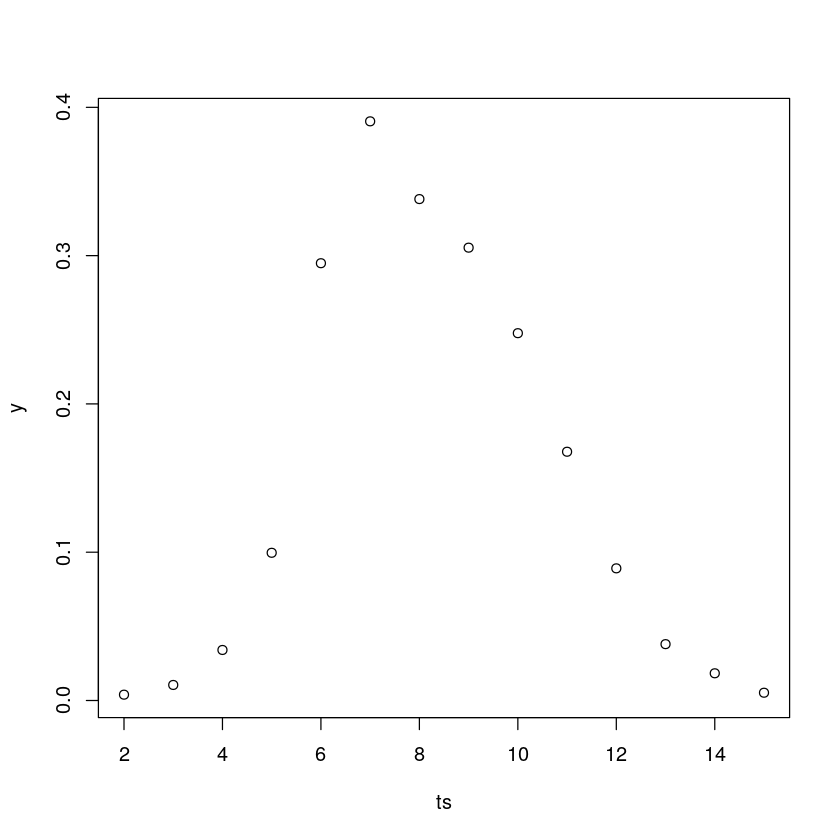

In [3]:
plot(epi.data$ts, epi.data$y, xlab = "ts", ylab = "y")

In [4]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
SIR_code <- stan_model(file = "stan/sir_simple_I_gamma.stan")

Loading required package: StanHeaders
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [5]:
SIR.map <- optimizing(SIR_code, data = epi.data, hessian = TRUE, verbose = TRUE)

Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: lognormal_lpdf: Location parameter[9] is nan, but must be finite!  (in 'model24c74dcdce30_sir_simple_I_gamma' at line 59)

Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: lognormal_lpdf: Location parameter[4] is nan, but must be finite!  (in 'model24c74dcdce30_sir_simple_I_gamma' at line 59)

Chain 1: Initial log joint probability = -221.951
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1:       19        11.421       2.00177       17.9077       1.212      0.0646       30   
Chain 1: Exception: lognormal_lpdf: Location parameter[11] is nan, but must be finite!  (in 'model24c74dcdce30_sir_simple_I_gamma' at line 59)


Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1:     

In [6]:
SIR.map

$par
   r_init[1]    r_init[2]         beta        gamma           S0        sigma 
0.6705156765 0.2790801006 1.8286414394 0.5750724302 0.9997284275 0.9999999069 
          R0   y_hat[1,1]   y_hat[2,1]   y_hat[3,1]   y_hat[4,1]   y_hat[5,1] 
3.1798454307 0.9952882138 0.9834270177 0.9444751605 0.8334728419 0.6113182221 
  y_hat[6,1]   y_hat[7,1]   y_hat[8,1]   y_hat[9,1]  y_hat[10,1]  y_hat[11,1] 
0.3632194232 0.2042696338 0.1266657464 0.0899799562 0.0716490998 0.0618890897 
 y_hat[12,1]  y_hat[13,1]  y_hat[14,1]   y_hat[1,2]   y_hat[2,2]   y_hat[3,2] 
0.0564284474 0.0532667858 0.0513948243 0.0033119396 0.0114028366 0.0376452857 
  y_hat[4,2]   y_hat[5,2]   y_hat[6,2]   y_hat[7,2]   y_hat[8,2]   y_hat[9,2] 
0.1093287608 0.2340003323 0.3183766738 0.2963217985 0.2236404760 0.1527851872 
 y_hat[10,2]  y_hat[11,2]  y_hat[12,2]  y_hat[13,2]  y_hat[14,2]   y_hat[1,3] 
0.0994759903 0.0631836676 0.0395943461 0.0246223661 0.0152433724 0.0013998466 
  y_hat[2,3]   y_hat[3,3]   y_hat[4,3]   y_hat[5,3]   y_hat[6,3]   y_hat[7,3] 
0.0051701457 0.0178795539 0.0571983974 0.1546814456 0.3184039030 0.4994085677 
  y_hat[8,3]   y_hat[9,3]  y_hat[10,3]  y_hat[11,3]  y_hat[12,3]  y_hat[13,3] 
0.6496937776 0.7572348567 0.8288749100 0.8749272426 0.9039772065 0.9221108481 
 y_hat[14,3]        y0[1]        y0[2]        y0[3]     y_rep[1]     y_rep[2] 
0.9333618033 0.9997284275 0.0002715725 0.0000000000 0.0006762677 0.0192948826 
    y_rep[3]     y_rep[4]     y_rep[5]     y_rep[6]     y_rep[7]     y_rep[8] 
0.0598345765 0.1459084055 1.0830331833 0.7656917200 0.2475116724 0.5295449153 
    y_rep[9]    y_rep[10]    y_rep[11]    y_rep[12]    y_rep[13]    y_rep[14] 
0.1906378305 0.1886256304 0.0843827512 0.0784233838 0.0089415717 0.0125765402 

$value
[1] 23.47346

$return_code
[1] 0

$hessian
         r_init.1 r_init.2          beta         gamma            S0
r_init.1        0        0  0.000000e+00  0.000000e+00  0.000000e+00
r_init.2        0        0  0.000000e+00  0.000000e+00  0.000000e+00
beta            0        0 -3.465062e+02  3.607434e+01  3.623524e+01
gamma           0        0  3.607434e+01 -3.255545e+01 -5.537005e+00
S0              0        0  3.623524e+01 -5.537005e+00 -4.615914e+00
sigma           0        0 -3.401248e-07 -1.070393e-07  3.661247e-10
                 sigma
r_init.1  0.000000e+00
r_init.2  0.000000e+00
beta     -3.401248e-07
gamma    -1.070393e-07
S0        3.661247e-10
sigma     1.292400e-06

$theta_tilde
     r_init[1] r_init[2]     beta     gamma        S0     sigma       R0
[1,] 0.6705157 0.2790801 1.828641 0.5750724 0.9997284 0.9999999 3.179845
     y_hat[1,1] y_hat[2,1] y_hat[3,1] y_hat[4,1] y_hat[5,1] y_hat[6,1]
[1,]  0.9952882   0.983427  0.9444752  0.8334728  0.6113182  0.3632194
     y_hat[7,1] y_hat[8,1] y_hat[9,1] y_hat[10,1] y_hat[11,1] y_hat[12,1]
[1,]  0.2042696  0.1266657 0.08997996   0.0716491  0.06188909  0.05642845
     y_hat[13,1] y_hat[14,1] y_hat[1,2] y_hat[2,2] y_hat[3,2] y_hat[4,2]
[1,]  0.05326679  0.05139482 0.00331194 0.01140284 0.03764529  0.1093288
     y_hat[5,2] y_hat[6,2] y_hat[7,2] y_hat[8,2] y_hat[9,2] y_hat[10,2]
[1,]  0.2340003  0.3183767  0.2963218  0.2236405  0.1527852  0.09947599
     y_hat[11,2] y_hat[12,2] y_hat[13,2] y_hat[14,2]  y_hat[1,3]  y_hat[2,3]
[1,]  0.06318367  0.03959435  0.02462237  0.01524337 0.001399847 0.005170146
     y_hat[3,3] y_hat[4,3] y_hat[5,3] y_hat[6,3] y_hat[7,3] y_hat[8,3]
[1,] 0.01787955  0.0571984  0.1546814  0.3184039  0.4994086  0.6496938
     y_hat[9,3] y_hat[10,3] y_hat[11,3] y_hat[12,3] y_hat[13,3] y_hat[14,3]
[1,]  0.7572349   0.8288749   0.8749272   0.9039772   0.9221108   0.9333618
         y0[1]        y0[2] y0[3]   y_rep[1]    y_rep[2]   y_rep[3]   y_rep[4]
[1,] 0.9997284 0.0002715725     0 0.01193291 0.009595386 0.01894742 0.04807314
      y_rep[5]  y_rep[6]  y_rep[7]  y_rep[8]  y_rep[9] y_rep[10]  y_rep[11]
[1,] 0.3210773 0.6343735 0.9210607 0.2678581 0.9470056 0.2826768 0.01714175
      y_rep[12]  y_rep[13]   y_rep[14]
[1,] 0.02401505 0.0133896


Divergences:


0 of 4000 iterations ended with a divergence.



Tree depth:


0 of 4000 iterations saturated the maximum tree depth of 10.



Energy:


E-BFMI indicated no pathological behavior.


Inference for Stan model: sir_simple_I_gamma.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean   sd 2.5%  25%  50%  75% 97.5% n_eff Rhat
beta  1.82    0.00 0.12 1.57 1.74 1.82 1.89  2.06  3181    1
gamma 0.60    0.00 0.06 0.49 0.56 0.59 0.63  0.72  2837    1
S0    1.00    0.00 0.00 1.00 1.00 1.00 1.00  1.00  2441    1
R0    3.09    0.01 0.40 2.36 2.83 3.06 3.31  3.99  3256    1
sigma 0.50    0.00 0.12 0.32 0.41 0.48 0.56  0.79  1582    1

Samples were drawn using NUTS(dense_e) at Fri Sep 20 09:00:26 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


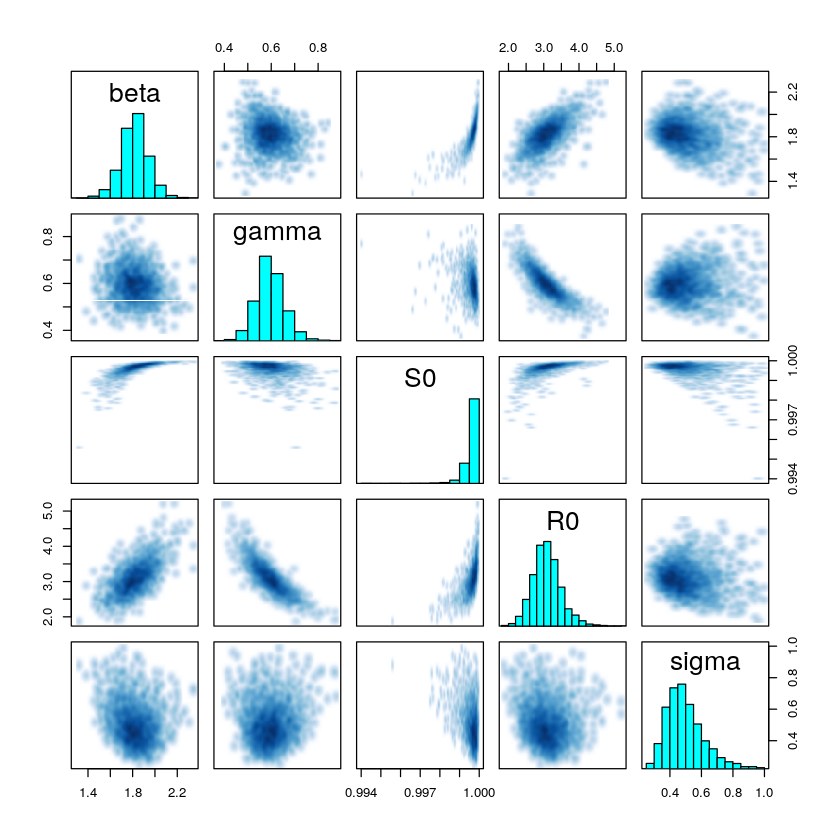

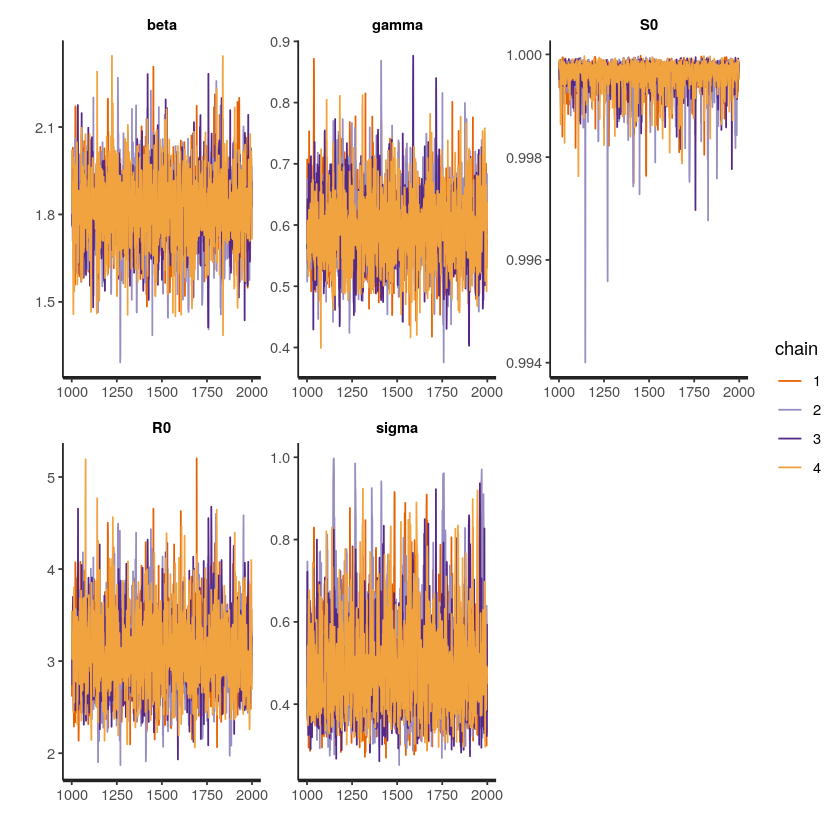

In [7]:
SIR.posterior <- sampling(SIR_code, data = epi.data, chains = 4,
                          control = list(adapt_delta = .95, metric = 'dense_e'))
check_hmc_diagnostics(SIR.posterior)
print(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
pairs(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
stan_trace(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))

In [8]:
rnorm_trunc <- function(n, m, s, lb = 0, ub = 1){
  ql <- pnorm(q = lb, mean = m, sd = s)
  qu <- pnorm(q = ub, mean = m, sd = s)
  U <- runif(n = n, min = ql, max = qu)
  return(
    qnorm(U, mean = m, sd = s)
  ) 
}
## 
generate_gamma_trajectory <- function(times,
                                          k_b, theta_b,
                                          k_g, theta_g,
                                          a_s, b_s,
                                          mu_s = .5, sd_s = .5){
  N <- length(times)  
  beta <- rgamma(1, shape = k_b, scale = theta_b)
  gamma <- rgamma(1, shape = k_g, scale = theta_g)
  sigma <- rnorm_trunc(1, m = mu_s, s = sd_s)
  S0 <- rbeta(n = 1, shape1 = a_s, shape2 = b_s)
  ## ODE solving
    require(deSolve)
  sir <- function(time, state, parameters) {
    with(as.list(c(state, parameters)), {
      dS <- -beta * S * I
      dI <-  beta * S * I - gamma * I
      dR <-                 gamma * I
      
      return(list(c(dS, dI, dR)))
    })
  }
  init       <- c(S = S0, I = 1-S0, R = 0.0)
  parameters <- c(beta = beta, gamma = gamma)
  sol <- as.data.frame(ode(y = init, times = times, func = sir, parms = parameters)) 
  ##
  traj <- 
    return(
      rlnorm(N, mean = log(sol$I), sd = sigma) ## sampling model is still log-normal
    )
}

In [9]:
Nrep <- 4000
prior.trajectories <- matrix(NA, ncol = length(epi.data$ts), nrow = Nrep)
for(i in 1:Nrep){
    prior.trajectories[i, ] <- suppressWarnings(
        generate_gamma_trajectory(times = epi.data$ts,
                                   k_b = epi.data$kb, theta_b = epi.data$thetab,
                                   k_g = epi.data$kg, theta_g = epi.data$thetag,
                                   a_s = epi.data$as, b_s = epi.data$bs,
                                   mu_s = 0.5, sd_s = 0.5)
    )
}

Loading required package: deSolve


In [10]:
prior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025, na.rm = TRUE))),
  post_mean = colMeans(prior.trajectories),
  upper = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975, na.rm = TRUE))),
  distribution = "prior"
)

In [11]:
posterior.trajectories <- extract(SIR.posterior, 'y_rep')$y_rep
posterior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025))),
  post_mean = colMeans(posterior.trajectories),
  upper = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975))),
  distribution = "posterior"
)

Warning message:
“Removed 12 rows containing missing values (geom_path).”

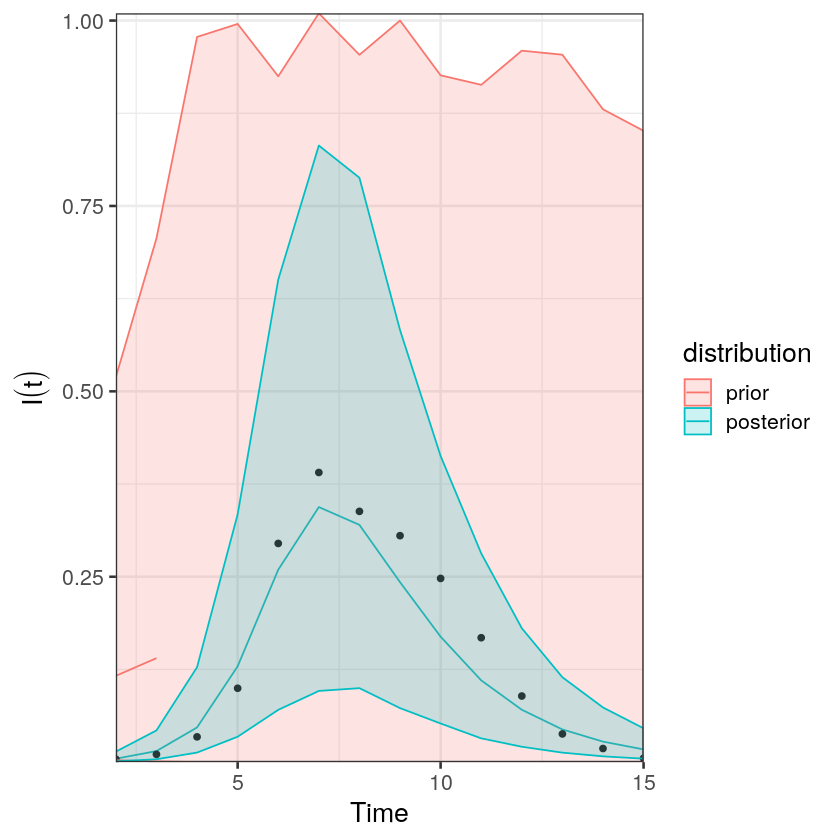

In [16]:
library(ggplot2)

predicted.incidence <- rbind(prior.predicted.incidence, posterior.predicted.incidence)

predictions_SIR <- ggplot(data = predicted.incidence, aes(x = time, y = post_mean,
                                                          colour = distribution, fill = distribution)) +
  geom_line() +
  geom_point(data = data.frame(time = epi.data$ts, I = epi.data$y),
             aes(x = time, y = I), inherit.aes = FALSE) +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2) +
  scale_x_continuous("Time", expand = c(0, 0)) + 
  scale_y_continuous(expression(I(t)), expand = c(0, 0)) + 
  theme_bw(base_size = 16)

predictions_SIR

In [ ]:
source("gamma_ratio.R")

Warning message:
“Removed 373 rows containing non-finite values (stat_density).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

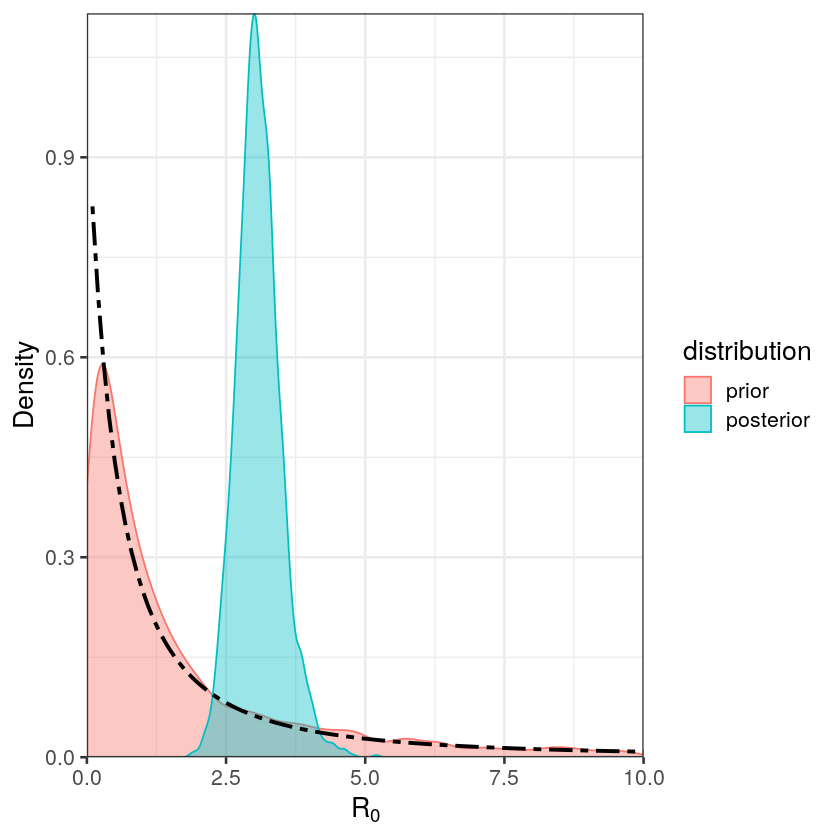

In [17]:
beta.prior.samples <- rgamma(Nrep, shape = epi.data$kb, scale = epi.data$thetab)
gamma.prior.samples <- rgamma(Nrep, shape = epi.data$kg, scale = epi.data$thetag)
R0.prior.samples <- data.frame(R0 = beta.prior.samples/gamma.prior.samples, distribution = "prior")

R0.posterior.samples <- data.frame(R0 = extract(SIR.posterior, 'R0')$R0, distribution = "posterior")

# R0.prior.samples <- data.frame(R0 = rep(NA, N), distribution = "prior")

R0.dt <- rbind(R0.prior.samples,
               R0.posterior.samples)

R0_posterior <- ggplot(data = R0.dt, aes(x = R0, colour = distribution, fill = distribution)) +
  geom_density(alpha = .4) +
#   geom_vline(xintercept = 1.5, linetype = "dotted", size = 1.01) + 
  scale_fill_discrete(drop = FALSE) +
  scale_colour_discrete(drop = FALSE) +
  stat_function(fun = function(x) dgamma.ratio(x,
                                               k1 = epi.data$kb,  t1 = epi.data$thetab,
                                               k2 = epi.data$kg, t2 = epi.data$thetag ,
                                               N = 1),
                inherit.aes = FALSE, linetype = "twodash", size = 1.10) +
  scale_x_continuous(expression(R[0]), expand = c(0, 0), limits = c(0, 10)) + 
  scale_y_continuous("Density", expand = c(0, 0)) + 
  theme_bw(base_size = 16)
R0_posterior